In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
df = pd.read_csv('data.csv')

In [25]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,5,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,5,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,6,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,5,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,5,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,6,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,6,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,5,10.2


In [26]:
le_results = LabelEncoder()
df['alcohol'] = le_results.fit_transform(df['alcohol'])

In [27]:
categorical_columns = ['fixed acidity',
                       'volatile acidity',
                       'citric acid',
                       'residual sugar',
                       'chlorides',
                       'free sulfur dioxide',
                       'total sulfur dioxide',
                       'density',
                       'pH',
                       'sulphates',
                       'quality']

In [28]:
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [29]:
X = df.iloc[:,1:-1]
y = df['alcohol']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [31]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([10, 12, 25, 11, 28, 11, 16, 15, 10, 23, 42, 12, 15, 17, 12, 49, 12,
       33, 45, 15, 32,  4, 41, 46, 11, 12, 33, 26,  7, 22, 12, 38, 15, 20,
       18,  7, 50, 23, 10, 39, 20,  7, 23, 17, 11, 32, 31, 10, 32, 39, 10,
        7, 12, 54, 12,  6, 36, 26, 20, 17, 20, 33, 12, 26, 31, 11, 33, 15,
       28, 12, 49, 26, 32, 40, 45, 11, 62, 33, 54, 49, 17, 33, 16, 29, 24,
       33, 16, 35, 32, 33, 12, 39, 38, 38, 12, 18, 17, 15, 32, 20, 15, 12,
       31, 31, 42, 33,  7, 16, 35,  7, 63, 11, 33, 11, 23,  7, 53, 16, 11,
       12, 43, 11, 28, 20, 11,  4, 35,  7, 26, 20, 32, 12, 12, 12, 39, 11,
        7, 15, 16, 24,  7, 12, 37, 15, 11, 12, 53, 31, 33, 11, 25, 37, 12,
       25, 32, 28, 15, 20, 23, 32, 43, 12, 38, 11, 12, 17,  4, 23, 11, 12,
       12, 12, 38, 23, 48, 32, 25, 11, 11, 39, 32, 43, 11, 46, 12, 11, 32,
       16, 53, 23, 23, 20, 12, 49, 23, 12, 17, 12, 12, 33, 12, 18, 11, 12,
       50, 41,  7, 11, 20, 26, 54,  7, 15, 45, 38, 26,  7, 10, 39, 16,  4,
       42, 37, 31, 32, 10

In [34]:
accuracy  = accuracy_score(y_test,y_pred)

In [35]:
accuracy

0.33125

In [36]:
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           4       0.50      0.60      0.55         5
           6       1.00      0.67      0.80         3
           7       0.31      0.31      0.31        16
          10       0.30      0.25      0.27        12
          11       0.28      0.36      0.31        22
          12       0.40      0.67      0.50        27
          15       0.26      0.45      0.33        11
          16       0.44      0.36      0.40        11
          17       0.55      0.43      0.48        14
          18       0.50      0.20      0.29        10
          19       0.00      0.00      0.00         1
          20       0.29      0.33      0.31        15
          22       0.75      0.23      0.35        13
          23       0.00      0.00      0.00         8
          24       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

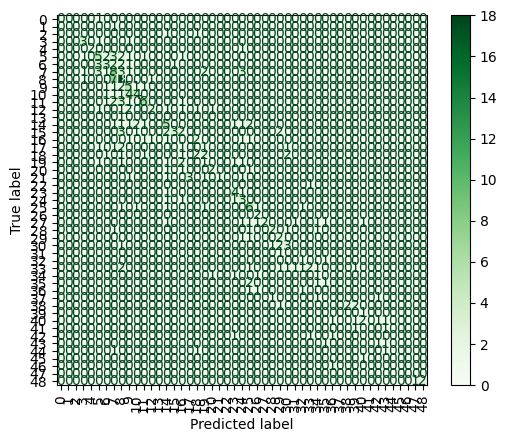

In [37]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='Greens')
plt.xticks(rotation=90)
plt.show()